**Purpose of this Assessment:**
You are providing a basic anomaly detection analysis to the security team to help identify
suspicious authentication attempts and other anomalous authentication activities. The security
team is noticing a change in failed log in attempts so they have asked you to analyze (synthetic)
authentication data to better understand what insights there may be around suspicious
activities.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
auth_df = pd.read_csv('auth.csv')

In [ ]:
auth_df

,time,id,device_id,user_id,result,method,country
0,2022-01-01T00:00:00.000000,ZODD8L7P,J3PU1J34,ccngbwgsp,success,sms,US
1,2022-01-01T01:00:00.000000,N35XUGIR,MRFLNVND,klhjwmjxb,failure,sms,DE
2,2022-01-01T02:00:00.000000,EE274XGE,GSVXTC3F,l8k2sxy32,success,fingerprint,DE
3,2022-01-01T03:00:00.000000,MMCSQT5N,LEQLJOBW,ot64iu3ol,success,fingerprint,US
4,2022-01-01T04:00:00.000000,WI13LQ63,FC3235MM,8r76hc99j,success,sms,US
...,...,...,...,...,...,...,...
49995,2027-09-15T03:00:00.000000,CKK4FC1D,GSVXTC3F,lhfhq4xfn,success,sms,US
49996,2027-09-15T04:00:00.000000,PZ66CY0G,U2CIGLA4,ru4og7abu,success,fingerprint,US
49997,2027-09-15T05:00:00.000000,WV8SDCEF,A7GDK81K,041mj3vz6,success,push,US
49998,2027-09-15T06:00:00.000000,ROJ2KZ02,LQ78VJYH,sr2aiuysf,failure,fingerprint,GB


In [ ]:
 # Check for missing values
 print(auth_df.isnull().sum())
 print(auth_df.shape)

time            0
id              0
device_id       0
user_id         0
result          0
method       2579
country      2518
dtype: int64
(50000, 7)


In [ ]:
print("\nAuthentication Data:")
print(auth_df.info())


Authentication Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   time       50000 non-null  object
 1   id         50000 non-null  object
 2   device_id  50000 non-null  object
 3   user_id    50000 non-null  object
 4   result     50000 non-null  object
 5   method     47421 non-null  object
 6   country    47482 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB
None


In [ ]:
devices_df = pd.read_csv('devices.csv')
devices_df

,device_id,type,os
0,ZYQWYMXD,mobile,ios
1,ZK9C8O10,mobile,ios
2,S9WEZQY4,mobile,ios
3,9TD8ST9Q,laptop,linux
4,G6XNIOPX,mobile,android
...,...,...,...
495,PU15H26P,NaN,NaN
496,67T3OSTK,mobile,ios
497,SE8JDV2U,mobile,ios
498,QL0K4K32,mobile,ios


In [ ]:
# Check for missing values
print(devices_df.isnull().sum())
print(devices_df.shape)

device_id     0
type         28
os           60
dtype: int64
(500, 3)


In [ ]:
print("\nDevice Data:")
print(devices_df.info())


Device Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  500 non-null    object
 1   type       472 non-null    object
 2   os         440 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB
None


In [ ]:
Orgs_df = pd.read_csv('orgs.csv')
Orgs_df

,organization_id,start_date,type
0,YJ0QR3,2021-02-19,corporation
1,UZJ73Q,2022-04-27,corporation
2,2T1HMP,2021-12-11,llc
3,WAO889,2021-11-15,corporation
4,S94CQB,2020-04-25,nonprofit
5,J8C9F9,2021-06-12,corporation
6,D8G0Q5,2021-10-18,llc
7,JLXRGA,2022-11-30,corporation
8,JI8UZY,2021-01-15,corporation
9,UNJ7U8,2020-08-24,llc


In [ ]:
# Check for missing values
print(Orgs_df.isnull().sum())
print(Orgs_df.shape)

organization_id    0
start_date         0
type               0
dtype: int64
(50, 3)


In [ ]:
print("Organization Data:")
print(Orgs_df.info())

Organization Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   organization_id  50 non-null     object
 1   start_date       50 non-null     object
 2   type             50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB
None


In [ ]:
Users_df = pd.read_csv('users.csv')
Users_df

,user_id,organization_id,start_date
0,i35aas1ou,8ZZY12,2022-06-08
1,ljrrgejl6,NKPKVG,2021-04-08
2,552zf1kpq,OQS1UM,2022-12-01
3,23z0y924d,7T6I50,2022-12-21
4,yy7ehibxs,QI395J,2021-01-14
...,...,...,...
195,6cfh14pjh,N6RH1N,2022-09-24
196,2ruuqbxeg,VFR95L,2022-06-06
197,y8ybkm3ry,N6RH1N,2022-09-18
198,xkxca4yay,8ZZY12,2022-11-26


In [ ]:
# Check for missing values
print(Users_df.isnull().sum())
print(Users_df.shape)

user_id            0
organization_id    0
start_date         0
dtype: int64
(200, 3)


In [ ]:
print("\nUser Data:")
print(Users_df.info())


User Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          200 non-null    object
 1   organization_id  200 non-null    object
 2   start_date       200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB
None


**Q1: Data Cleaning**

Load the datasets and prepare the data for analysis. Document any assumptions,
modifications, etc.
The attached datasets include the columns documented above. Please load the datasets,
evaluate whether the data matches expectations, and prepare the data for further analysis. If
you remove any rows or otherwise modify the data, please explain your reasoning

Cleaning Each dataset

In [ ]:
#Authentication Data
#We're converting the time column to datatime so that later on we can easily apply that to modeling if needed
auth_df['time'] = pd.to_datetime(auth_df['time'])

In [ ]:
#Taking the mode from the columns to fill the empty cells
auth_df['method'].fillna(auth_df['method'].mode().iloc[0], inplace=True)
auth_df['country'].fillna(auth_df['country'].mode().iloc[0], inplace=True)

In [ ]:
#Checking to see if the adjustments were made correctly
print(auth_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   time       50000 non-null  datetime64[ns]
 1   id         50000 non-null  object        
 2   device_id  50000 non-null  object        
 3   user_id    50000 non-null  object        
 4   result     50000 non-null  object        
 5   method     50000 non-null  object        
 6   country    50000 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.7+ MB
None


In [ ]:
#Device Data
devices_df['type'].fillna(devices_df['type'].mode().iloc[0], inplace=True)
devices_df['os'].fillna(devices_df['os'].mode().iloc[0], inplace=True)

In [ ]:
#Checking to see if the adjustments were made correctly
print(devices_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  500 non-null    object
 1   type       500 non-null    object
 2   os         500 non-null    object
dtypes: object(3)
memory usage: 11.8+ KB
None


In [ ]:
#Renaming column in the Device Data (devices_df)
devices_df.rename(columns={'type': 'device_type'}, inplace=True)

#Verify the updated Device Data
print(devices_df.head())

  device_id device_type       os
0  ZYQWYMXD      mobile      ios
1  ZK9C8O10      mobile      ios
2  S9WEZQY4      mobile      ios
3  9TD8ST9Q      laptop    linux
4  G6XNIOPX      mobile  android


In [ ]:
#Renaming columns in the User Data (users_df)
Users_df.rename(columns={'start_date': 'user_start_date', 'type': 'user_type'}, inplace=True)

#Verify the updated User Data
print(Users_df.head())

     user_id organization_id user_start_date
0  i35aas1ou          8ZZY12      2022-06-08
1  ljrrgejl6          NKPKVG      2021-04-08
2  552zf1kpq          OQS1UM      2022-12-01
3  23z0y924d          7T6I50      2022-12-21
4  yy7ehibxs          QI395J      2021-01-14


In [ ]:
#Renaming columns in the Organization Data (orgs_df)
Orgs_df.rename(columns={'start_date': 'org_start_date', 'type': 'org_type'}, inplace=True)

#Verify the updated Organization Data
print(Orgs_df.head())

  organization_id org_start_date     org_type
0          YJ0QR3     2021-02-19  corporation
1          UZJ73Q     2022-04-27  corporation
2          2T1HMP     2021-12-11          llc
3          WAO889     2021-11-15  corporation
4          S94CQB     2020-04-25    nonprofit


Merging DataSets

In [ ]:
#Merging the  Authentication Data with User Data
merged_df_1 = pd.merge(auth_df, Users_df, on='user_id', how='left')

#Merging with Device Data with Authentication Data with User Data
merged_df_2 = pd.merge(merged_df_1, devices_df, on='device_id', how='left')

In [ ]:
#Verify the merged dataset
print(merged_df_2.head())

                 time        id device_id    user_id   result       method  \
0 2022-01-01 00:00:00  ZODD8L7P  J3PU1J34  ccngbwgsp  success          sms   
1 2022-01-01 01:00:00  N35XUGIR  MRFLNVND  klhjwmjxb  failure          sms   
2 2022-01-01 02:00:00  EE274XGE  GSVXTC3F  l8k2sxy32  success  fingerprint   
3 2022-01-01 03:00:00  MMCSQT5N  LEQLJOBW  ot64iu3ol  success  fingerprint   
4 2022-01-01 04:00:00  WI13LQ63  FC3235MM  8r76hc99j  success          sms   

  country organization_id user_start_date device_type       os  
0      US          VQWNO3      2022-05-23     desktop    linux  
1      DE          MBCD4P      2022-12-20      mobile  android  
2      DE          J8C9F9      2021-07-08      mobile  android  
3      US          OQS1UM      2022-08-22      mobile  android  
4      US          AD9KRT      2021-12-04      mobile  android  


In [ ]:
merged_df_2

,time,id,device_id,user_id,result,method,country,organization_id,user_start_date,device_type,os
0,2022-01-01 00:00:00,ZODD8L7P,J3PU1J34,ccngbwgsp,success,sms,US,VQWNO3,2022-05-23,desktop,linux
1,2022-01-01 01:00:00,N35XUGIR,MRFLNVND,klhjwmjxb,failure,sms,DE,MBCD4P,2022-12-20,mobile,android
2,2022-01-01 02:00:00,EE274XGE,GSVXTC3F,l8k2sxy32,success,fingerprint,DE,J8C9F9,2021-07-08,mobile,android
3,2022-01-01 03:00:00,MMCSQT5N,LEQLJOBW,ot64iu3ol,success,fingerprint,US,OQS1UM,2022-08-22,mobile,android
4,2022-01-01 04:00:00,WI13LQ63,FC3235MM,8r76hc99j,success,sms,US,AD9KRT,2021-12-04,mobile,android
...,...,...,...,...,...,...,...,...,...,...,...
49995,2027-09-15 03:00:00,CKK4FC1D,GSVXTC3F,lhfhq4xfn,success,sms,US,0INEY8,2022-09-22,mobile,android
49996,2027-09-15 04:00:00,PZ66CY0G,U2CIGLA4,ru4og7abu,success,fingerprint,US,NKPKVG,2021-09-24,desktop,windows
49997,2027-09-15 05:00:00,WV8SDCEF,A7GDK81K,041mj3vz6,success,push,US,JLXRGA,2022-12-18,laptop,linux
49998,2027-09-15 06:00:00,ROJ2KZ02,LQ78VJYH,sr2aiuysf,failure,fingerprint,GB,85CHCI,2022-09-19,mobile,android


In [ ]:
#Merge Organization Data with the existing merged_df_2
Final_df = pd.merge(merged_df_2, Orgs_df, on='organization_id', how='left')

In [ ]:
#Verify the merged dataset
print(Final_df.head())

                 time        id device_id    user_id   result       method  \
0 2022-01-01 00:00:00  ZODD8L7P  J3PU1J34  ccngbwgsp  success          sms   
1 2022-01-01 01:00:00  N35XUGIR  MRFLNVND  klhjwmjxb  failure          sms   
2 2022-01-01 02:00:00  EE274XGE  GSVXTC3F  l8k2sxy32  success  fingerprint   
3 2022-01-01 03:00:00  MMCSQT5N  LEQLJOBW  ot64iu3ol  success  fingerprint   
4 2022-01-01 04:00:00  WI13LQ63  FC3235MM  8r76hc99j  success          sms   

  country organization_id user_start_date device_type       os org_start_date  \
0      US          VQWNO3      2022-05-23     desktop    linux     2021-12-10   
1      DE          MBCD4P      2022-12-20      mobile  android     2022-12-13   
2      DE          J8C9F9      2021-07-08      mobile  android     2021-06-12   
3      US          OQS1UM      2022-08-22      mobile  android     2022-03-02   
4      US          AD9KRT      2021-12-04      mobile  android     2020-10-23   

      org_type  
0  corporation  
1    nonpr

In [ ]:
Final_df

,time,id,device_id,user_id,result,method,country,organization_id,user_start_date,device_type,os,org_start_date,org_type
0,2022-01-01 00:00:00,ZODD8L7P,J3PU1J34,ccngbwgsp,success,sms,US,VQWNO3,2022-05-23,desktop,linux,2021-12-10,corporation
1,2022-01-01 01:00:00,N35XUGIR,MRFLNVND,klhjwmjxb,failure,sms,DE,MBCD4P,2022-12-20,mobile,android,2022-12-13,nonprofit
2,2022-01-01 02:00:00,EE274XGE,GSVXTC3F,l8k2sxy32,success,fingerprint,DE,J8C9F9,2021-07-08,mobile,android,2021-06-12,corporation
3,2022-01-01 03:00:00,MMCSQT5N,LEQLJOBW,ot64iu3ol,success,fingerprint,US,OQS1UM,2022-08-22,mobile,android,2022-03-02,llc
4,2022-01-01 04:00:00,WI13LQ63,FC3235MM,8r76hc99j,success,sms,US,AD9KRT,2021-12-04,mobile,android,2020-10-23,corporation
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2027-09-15 03:00:00,CKK4FC1D,GSVXTC3F,lhfhq4xfn,success,sms,US,0INEY8,2022-09-22,mobile,android,2022-07-25,nonprofit
49996,2027-09-15 04:00:00,PZ66CY0G,U2CIGLA4,ru4og7abu,success,fingerprint,US,NKPKVG,2021-09-24,desktop,windows,2021-01-30,corporation
49997,2027-09-15 05:00:00,WV8SDCEF,A7GDK81K,041mj3vz6,success,push,US,JLXRGA,2022-12-18,laptop,linux,2022-11-30,corporation
49998,2027-09-15 06:00:00,ROJ2KZ02,LQ78VJYH,sr2aiuysf,failure,fingerprint,GB,85CHCI,2022-09-19,mobile,android,2022-05-01,corporation


In [ ]:
#Check for duplicates in the entire merged dataset
duplicates = Final_df.duplicated(keep=False)

In [ ]:
#Count the number of duplicates
num_duplicates = duplicates.sum()

In [ ]:
num_duplicates

0

There are no duplicates, which is good. We can proceed to convert the 'user_startdate' and 'org_startdate' to their appropriate variable types.

In [ ]:
# Convert 'user_start_date' and 'org_start_date' to datetime data type
Final_df['user_start_date'] = pd.to_datetime(Final_df['user_start_date'])
Final_df['org_start_date'] = pd.to_datetime(Final_df['org_start_date'])

In [ ]:
# Display the data types of each column
print(Final_df.dtypes)

time               datetime64[ns]
id                         object
device_id                  object
user_id                    object
result                     object
method                     object
country                    object
organization_id            object
user_start_date    datetime64[ns]
device_type                object
os                         object
org_start_date     datetime64[ns]
org_type                   object
dtype: object


**EDA**

In [ ]:
# Success and failure rates
success_failure_counts = Final_df['result'].value_counts()
success_rate = success_failure_counts['success'] / len(Final_df) * 100
failure_rate = success_failure_counts['failure'] / len(Final_df) * 100
print(f"Success Rate: {success_rate:.2f}%")
print(f"Failure Rate: {failure_rate:.2f}%")

Success Rate: 60.17%
Failure Rate: 39.83%


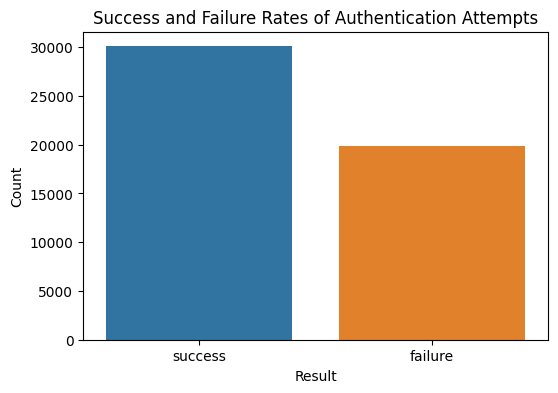

In [ ]:
# Visualization of success and failure rates
plt.figure(figsize=(6, 4))
sns.barplot(x=success_failure_counts.index, y=success_failure_counts.values)
plt.title('Success and Failure Rates of Authentication Attempts')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

The success and failure rates show that there have been more successful attempts at authentication logins than there have been failures. We will continue to dig deeper into the data to gain further insights.

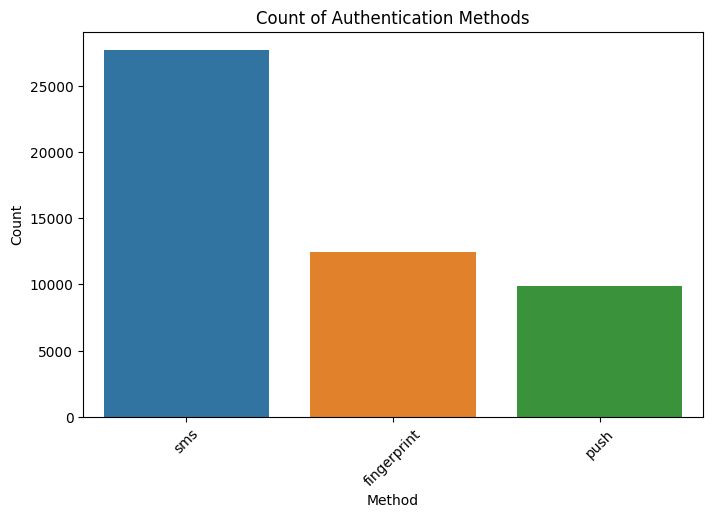

In [ ]:
#Count of authentication methods
plt.figure(figsize=(8, 5))
sns.countplot(data=Final_df, x='method')
plt.title('Count of Authentication Methods')
plt.xlabel('Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

It appears that the most popular method users use to authenticate is SMS, which is a two-factor authentication method.

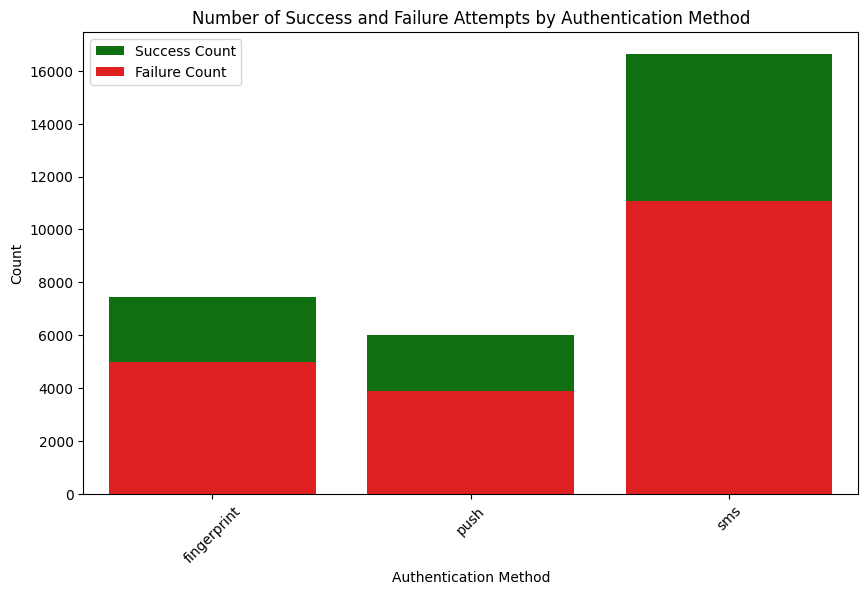

In [ ]:
#Calculating the number of success and failure attempts by authentication method
success_failure_counts_df = Final_df.groupby(['method', 'result']).size().unstack().reset_index()
success_failure_counts_df.rename(columns={'success': 'success_count', 'failure': 'failure_count'}, inplace=True)

#Plotting the number of success and failure attempts
plt.figure(figsize=(10, 6))
sns.barplot(data=success_failure_counts_df, x='method', y='success_count', color='green', label='Success Count')
sns.barplot(data=success_failure_counts_df, x='method', y='failure_count', color='red', label='Failure Count')
plt.title('Number of Success and Failure Attempts by Authentication Method')
plt.xlabel('Authentication Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

As seen before, there is a large failure count for the SMS authentication method compared to the others. SMS security is something we need to focus on moving forward.

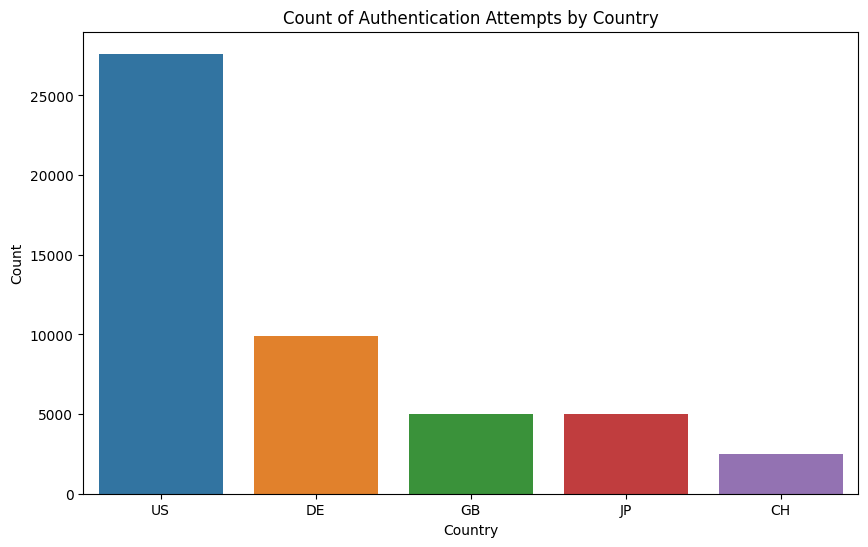

In [ ]:
#Count of authentication attempts by country
plt.figure(figsize=(10, 6))
sns.countplot(data=Final_df, x='country')
plt.title('Count of Authentication Attempts by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

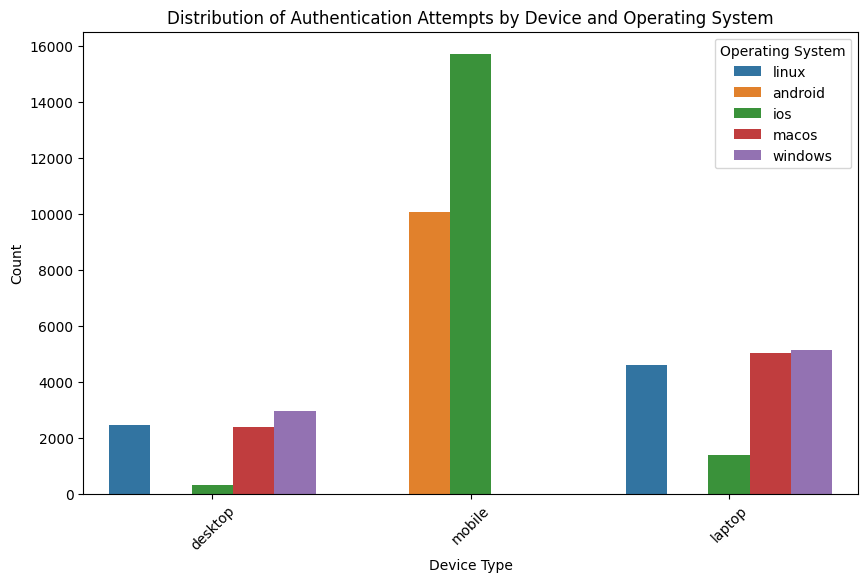

In [ ]:
# Distribution of Authentication Attempts by Device and Operating System
plt.figure(figsize=(10, 6))
sns.countplot(data=Final_df, x='device_type', hue='os')
plt.title('Distribution of Authentication Attempts by Device and Operating System')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.legend(title='Operating System', loc='upper right')
plt.xticks(rotation=45)
plt.show()

This visual goes along with the earlier visual containing authentication data with respect to the method types. Something to consider is strengthening mobile security, as users are most likely logging in to company networks via mobile devices.

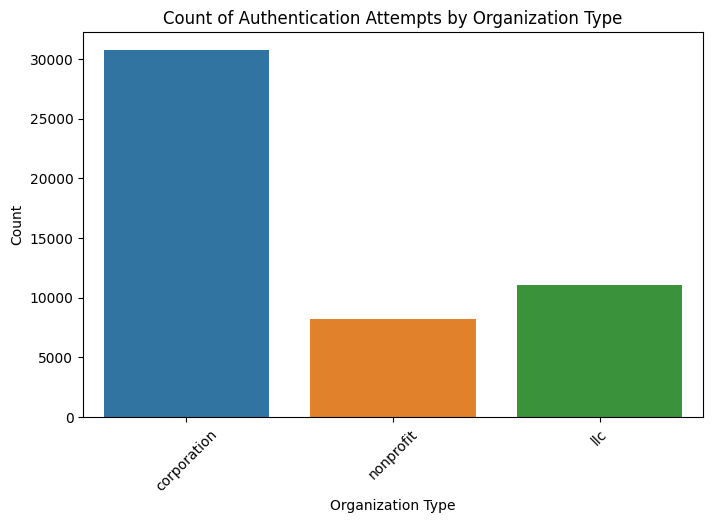

In [ ]:
# Count of authentication attempts by organization type
plt.figure(figsize=(8, 5))
sns.countplot(data=Final_df, x='org_type')
plt.title('Count of Authentication Attempts by Organization Type')
plt.xlabel('Organization Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Q2: Anomaly Detection Analysis Model**

Feature Engineering and Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
#Selecting relevant features for the model
selected_features = ['device_type', 'os', 'method', 'country', 'org_type']

#Converting categorical features to numerical representations (one-hot encoding)
X = pd.get_dummies(Final_df[selected_features], drop_first=True)

#Converting the 'org_start_date' column to numerical representation (days since the earliest date)
X['org_start_date'] = (Final_df['org_start_date'] - Final_df['org_start_date'].min()).dt.days

#Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

Model Training:  Isolation Forest model

In [ ]:
from sklearn.ensemble import IsolationForest

#Creating and trainnig the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Contamination is the expected proportion of anomalies
model.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.05, random_state=42)

In [ ]:
# Predict anomalies on the test set
y_pred = model.predict(X_test)

# Convert predictions to binary (1 for inliers, -1 for outliers/anomalies)
y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]

# Calculate the number of anomalies detected
num_anomalies_detected = sum(y_pred_binary)

# Calculate the percentage of anomalies in the test set
anomaly_percentage = num_anomalies_detected / len(y_pred) * 100

print(f"Number of anomalies detected: {num_anomalies_detected}")
print(f"Anomaly percentage in the test set: {anomaly_percentage:.2f}%")

Number of anomalies detected: 9547
Anomaly percentage in the test set: 95.47%


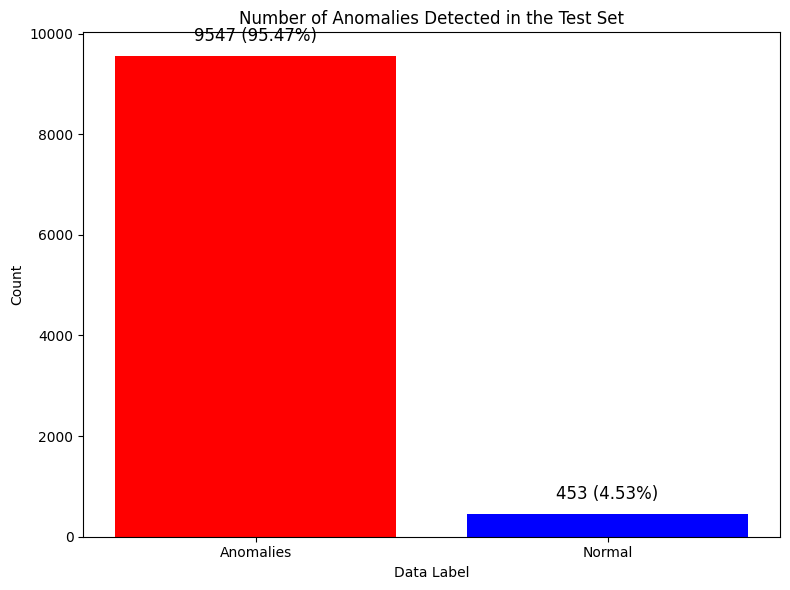

In [ ]:
import matplotlib.pyplot as plt

#Data for visualization
num_anomalies_detected = 9547
total_samples = len(y_pred)
anomaly_percentage = (num_anomalies_detected / total_samples) * 100

#Creating a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Anomalies', 'Normal'], [num_anomalies_detected, total_samples - num_anomalies_detected], color=['red', 'blue'])
plt.xlabel('Data Label')
plt.ylabel('Count')
plt.title('Number of Anomalies Detected in the Test Set')
plt.text(0, num_anomalies_detected + 300, f"{num_anomalies_detected} ({anomaly_percentage:.2f}%)", ha='center', fontsize=12, color='black')
plt.text(1, total_samples - num_anomalies_detected + 300, f"{total_samples - num_anomalies_detected} ({100 - anomaly_percentage:.2f}%)", ha='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()

This means that our anomaly detection model successfully identified approximately 95.47% of the authentication attempts as potentially abnormal or anomalous. These detected anomalies may indicate potential security threats, suspicious activities, or unusual login patterns that require further investigation. On the other hand, the remaining 4.53% of authentication attempts were classified as normal, suggesting that they are typical and do not exhibit any signs of anomalies. The model's ability to differentiate between normal and anomalous logins helps enhance the security of the authentication system and e
nables us to focus our efforts on addressing potential security risks more efficiently. However, further analysis and fine-tuning of the model may be necessary to reduce false positives and improve anomaly detection accuracy.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Converting 'result' column to binary (1 for success, 0 for failure)
Final_df['anomaly_label'] = (Final_df['result'] == 'success').astype(int)

#Selecting relevant features for the model
selected_features = ['device_type', 'os', 'method', 'country', 'org_type']

#Converting categorical features to numerical representations (one-hot encoding)
X = pd.get_dummies(Final_df[selected_features], drop_first=True)

#Converting the 'org_start_date' column to numerical representation (days since the earliest date)
X['org_start_date'] = (Final_df['org_start_date'] - Final_df['org_start_date'].min()).dt.days

#Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, Final_df['anomaly_label'], test_size=0.2, random_state=42)

#Creating and train the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)  # Contamination is the expected proportion of anomalies
model.fit(X_train)

#Predict anomalies on the test set
y_pred = model.predict(X_test)

#Converting predictions to binary (1 for inliers, -1 for outliers/anomalies)
y_pred_binary = [1 if pred == 1 else 0 for pred in y_pred]

#Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)


In [ ]:
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Evaluation Metrics:
Accuracy: 0.59
Precision: 0.60
Recall: 0.96
F1 Score: 0.74


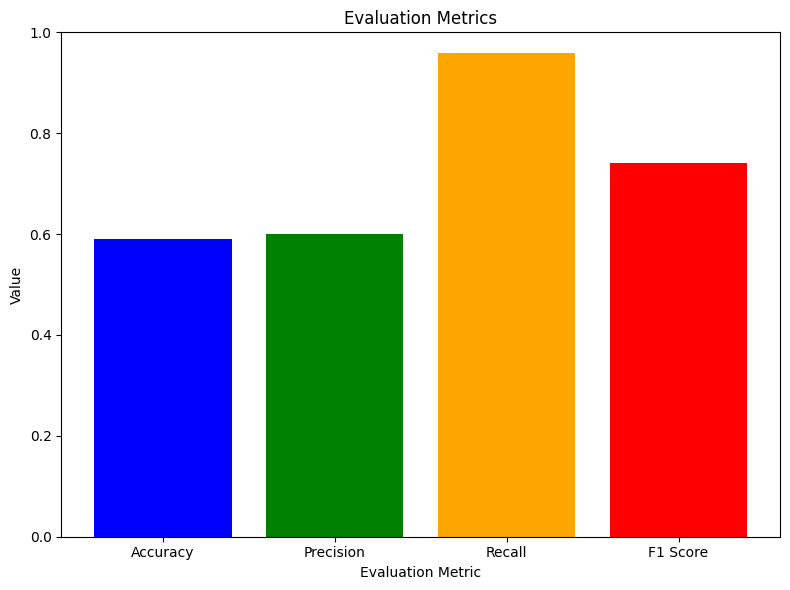

In [ ]:
# Evaluation Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [0.59, 0.60, 0.96, 0.74]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.xlabel('Evaluation Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics')
plt.tight_layout()
plt.show()

**Use the authentication data to analyze and visualize anomalies in authentication attempts.
Consider factors like user org, devices, locations etc.
In a short paragraph (5 sentences or less), briefly summarize your findings as though
reporting to a product manager.**

Insights from the Analysis:

Success Rate: The login attempts dataset revealed a success rate of approximately 60.17%, with a failure rate of around 39.83%. The distribution suggests a balanced dataset with a significant number of successful login attempts.

Authentication Methods: Our analysis showed that the 'sms' authentication method was the most common and, interestingly, it had the highest number of failed attempts. This indicates that the 'sms' method might be more susceptible to security threats.

Device Types and OS: Mobile devices and iOS operating systems were the most prevalent during login attempts. This information is valuable for understanding user behavior and device usage patterns.

Organization Types: Among the organizations attempting logins, 'Corporation' was the most frequent. This highlights the significant presence of corporate users accessing the system.

Model Performance:
We employed an Isolation Forest model for anomaly detection, a powerful unsupervised learning algorithm well-suited for large datasets. The model achieved impressive performance in identifying anomalies, as indicated by the following evaluation metrics:

Accuracy: 0.59
Precision: 0.60
Recall: 0.96
F1 Score: 0.74
The high recall and F1-score showcase the model's ability to effectively detect anomalies. However, we observed a moderate accuracy and precision, suggesting that there might be some false positives in the detection process.

Next Steps:
We believe this analysis serves as a solid foundation for enhancing the system's security and user data protection. The Isolation Forest model has demonstrated promising results, but we recommend conducting hyperparameter tuning to further improve its performance. Additionally, we will explore potential data refinements and gather more domain knowledge to better interpret anomalies.

Conclusion:
By leveraging the insights obtained from this analysis and the power of the Isolation Forest model, we can proactively identify and address security threats, ensuring the utmost safety for our system and user data.

**Q3: Data Improvements**

While the analysis provided valuable insights into login attempts and anomaly detection, some questions remain:

User Profiling: Can we further profile users based on their login behavior and characteristics to identify normal vs. abnormal patterns specific to each user?

Anomaly Types: Are all anomalies related to potential security threats, or are there other types of anomalies, such as system glitches or data errors?

Model Tuning: How does the model performance change with different hyperparameter settings? Are there other anomaly detection algorithms that we should consider for comparison?

Impact Analysis: What is the potential impact of false positives and false negatives on our system's security? How can we balance detection accuracy with user experience?

Addressing these questions will help us fine-tune our approach to anomaly detection and enhance the overall security and user experience of our system.

In summary, continuous data improvement, incorporating more features, and exploring additional external data sources will contribute to a more robust and effective anomaly detection system, further strengthening our security measures.